# Random Forest

In [284]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

src_dir = os.path.abspath(os.pardir)
sys.path[0] = src_dir

from analysis.CodingScoring import scoreTIPI, normTIPI, stratTIPI

Import data

In [285]:
questions = pd.read_csv('../data/External/dataHeadings.csv')
dataRaw = pd.read_csv('../data/External/dataRaw.csv', names=questions.QuestionCode)

In [286]:
df = dataRaw.join(normTIPI(scoreTIPI(dataRaw)))
cxOCEAS = df[['Chronotype','O','C','E','A','S']].dropna()

### Random Forest Classifier for continuous data

In [287]:
X = cxOCEAS[['O','C','E','A','S']].values
y = cxOCEAS['Chronotype'].replace(['Strong owl','Owl','Lark','Strong lark'],[1,2,3,4]).values

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [289]:
rfc = RandomForestClassifier(n_estimators=20,random_state=0) 
rfc.fit(X_train, y_train)  
y_pred = rfc.predict(X_test)

In [290]:
rfc.score(X_test, y_test)

0.3436293436293436

In [291]:
rfc.feature_importances_

array([0.18246019, 0.12985817, 0.24675142, 0.21165833, 0.22927189])

In [292]:
# picked highest feature importances from above: E, N/S
# interestingly these were not the most significant and happen to be the least affected
# by social desireability
E_plot = X_test[:,2].reshape(1,-1)
E_plot = E_plot[0]+np.random.randn(E_plot.size)*.1
N_plot = X_test[:,4].reshape(1,-1)
N_plot = N_plot[0]+np.random.randn(N_plot.size)*.1

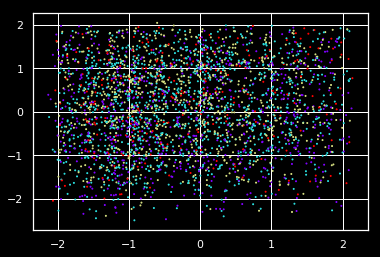

In [293]:
plt.scatter(E_plot,N_plot,c=y_test,s=1,cmap='rainbow')

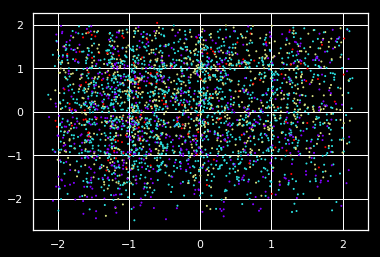

In [294]:
plt.scatter(E_plot,N_plot,c=y_pred,s=1,cmap='rainbow')

### Random forest classifier for binned data

In [250]:
cxOCEAS['N'] = 0-cxOCEAS['S']
cxOCEAN = cxOCEAS.drop(columns=['S'])
cxOCEAN_strat = stratTIPI(cxOCEAN,3).dropna()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [251]:
X = cxOCEAN_strat[['O_strat','C_strat','E_strat','A_strat','N_strat']].values
y = cxOCEAN_strat['Chronotype'].replace(['Strong owl','Owl','Lark','Strong lark'],
                                        [1,2,3,4]).values

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [253]:
rfc = RandomForestClassifier(n_estimators=20,random_state=0) 
rfc.fit(X_train, y_train)  
y_pred = rfc.predict(X_test)

In [254]:
rfc.score(X_test, y_test)

0.4041184041184041

In [255]:
rfc.feature_importances_

array([0.19288571, 0.3098105 , 0.1909551 , 0.15801725, 0.14833144])

In [256]:
# agained picked highest feature importances from above; this time C, O 
# C, O are on par with the highest effect sizes in the significance testing
C_plot = X_test[:,1].reshape(1,-1)
C_plot = C_plot[0]+np.random.randn(C_plot.size)*.15
O_plot = X_test[:,0].reshape(1,-1)
O_plot = O_plot[0]+np.random.randn(O_plot.size)*.15

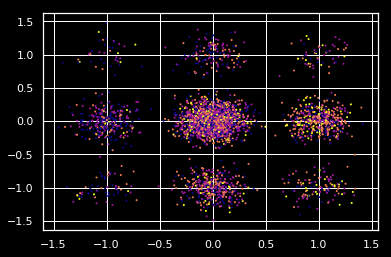

In [263]:
plt.scatter(C_plot,O_plot,c=y_test,s=1,cmap='plasma')

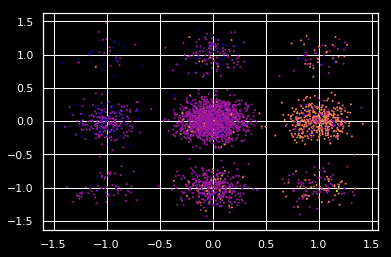

In [262]:
plt.scatter(C_plot,O_plot,c=y_pred,s=1,cmap='plasma')